# Classification of Meteorological Disaster-related Tweets Using Convolutional Neural Network
This notebook is composed of **n** modules:
1. Loader Module
 1. Dummy Module
2. Explorer Module
3. Embedding Module

#### Questions to consider
- What will we do if one class' samples dominate the other?
- Which is the most appropriate word embedding?

## Loader Module
This module contains the functions to load the data from the dataset. Specifically, it does the following:
- Read the csv file (tweets.csv) and convert it to pandas dataframe
- Remove unnecessary columns
- Remove all RTs


In [1]:
# Import libraries
import pandas as pd               # For data manipulation
import matplotlib.pyplot as plt    # For data visualization

In [2]:
# Read csv file
tweets_df = pd.read_csv('yolanda_tweets.csv', encoding='utf-16')

# Print the shape of the dataframe
print(f"Shape: {tweets_df.shape}")

# Show first 10 tweets in the dataframe
tweets_df.head(10)

Shape: (2753230, 2)


,tweet,created_at
0,RT @KatDeCastro: Yes folks. This is the bigges...,Thu Nov 07 10:48:40 +0000 2013
1,RT @jolorevilla: All classes pre-school to HS ...,Thu Nov 07 10:48:40 +0000 2013
2,"RT @DepEd_PH: BOROGAN CITY, SAMAR | #walangpas...",Thu Nov 07 10:48:40 +0000 2013
3,"Take care and God bless, Visayas!!! #YolandaPH...",Thu Nov 07 10:48:40 +0000 2013
4,Praying for Leyte and Samar..,Thu Nov 07 10:48:41 +0000 2013
5,#pray for the people of the Philippines for th...,Thu Nov 07 10:48:41 +0000 2013
6,Sa mga nakatira sa visayas!! Mag ingat po kau ...,Thu Nov 07 10:48:42 +0000 2013
7,ΓÇ£@Justiniiiiiine: Pray for Leyte and the oth...,Thu Nov 07 10:48:42 +0000 2013
8,Umuulan na! Be safe everyone. Lets pray that n...,Thu Nov 07 10:48:43 +0000 2013
9,RT @TVPatrol: #TVPatrol Mga lugar na nasa ilal...,Thu Nov 07 10:48:44 +0000 2013


In [3]:
# Drop 'created_at' column since it is not needed
tweets_df = tweets_df.drop(['created_at'], axis=1)
tweets_df.head(5)

,tweet
0,RT @KatDeCastro: Yes folks. This is the bigges...
1,RT @jolorevilla: All classes pre-school to HS ...
2,"RT @DepEd_PH: BOROGAN CITY, SAMAR | #walangpas..."
3,"Take care and God bless, Visayas!!! #YolandaPH..."
4,Praying for Leyte and Samar..


In [4]:
print(f"Previous shape: {tweets_df.shape}")

# This is the point where we need to clean our data

# 1. Remove all the RTs
tweets_df = tweets_df.loc[~tweets_df['tweet'].str.startswith("RT")]
print(f"New shape: {tweets_df.shape}")


Previous shape: (2753230, 1)
New shape: (1140054, 1)


## Dummy Module
This module will be used while the process of manual tweet labelling is still ongoing. This module does the same steps as above
but uses fewer and labelled dataset.

In [5]:
tweets_df = pd.read_csv('yolanda_crisislex_labeled.csv', 
                        encoding='utf-8', 
                        names=['Tweet ID', 'Tweet Text', 'Information Source', 'Information Type', 'Informativeness'],
                        skiprows=1
                       )
tweets_df.head(10)

,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness
0,397748184581025793,"May super typhoon pala this weekend, Paano na ...",Outsiders,Sympathy and support,Related - but not informative
1,397781298577559552,RT @ChikkanessAve: Ariella Arida on her swimwe...,Not labeled,Not labeled,Not related
2,397915554066857985,Tropical storm Haiyan intensifies into typhoon...,Media,Caution and advice,Related and informative
3,397978405720686592,Super Typhoon Yolanda be good sa mga taga Boho...,Outsiders,Sympathy and support,Related - but not informative
4,398015038759247872,RT @MsCandice_UC: Advisory- As of 2am Nov 6 #Y...,Outsiders,Caution and advice,Related and informative
5,398036631057231872,#YolandaPH pray for the entire Philippines.,Outsiders,Sympathy and support,Related - but not informative
6,398041534190211072,"#Yolanda Langya, pangalan pa ng nanay ko bagyo...",Not labeled,Not labeled,Not applicable
7,398046118547685376,Hoping for a no class tomorrow:) #bagyo #yolanda,Eyewitness,Other Useful Information,Related - but not informative
8,398051566977953792,@TVPatrol #TVPatrol Inalerto agad ni Gov.David...,Media,Caution and advice,Related and informative
9,398062564447232000,Fruit Bounty - 10% Off http://t.co/Smw6x5dFBK ...,Not labeled,Not labeled,Not related


In [6]:
# Drop unnecessary columns
tweets_df = tweets_df.drop(['Tweet ID', 'Information Source'], axis=1)
tweets_df.head(5)

,Tweet Text,Information Type,Informativeness
0,"May super typhoon pala this weekend, Paano na ...",Sympathy and support,Related - but not informative
1,RT @ChikkanessAve: Ariella Arida on her swimwe...,Not labeled,Not related
2,Tropical storm Haiyan intensifies into typhoon...,Caution and advice,Related and informative
3,Super Typhoon Yolanda be good sa mga taga Boho...,Sympathy and support,Related - but not informative
4,RT @MsCandice_UC: Advisory- As of 2am Nov 6 #Y...,Caution and advice,Related and informative


In [7]:
# Inspecting the dataset, we have a 'Not labeled' classification. We'll remove this later

pd.value_counts(tweets_df['Information Type'].values, sort=False)


Sympathy and support            180
Infrastructure and utilities     21
Other Useful Information        123
Not labeled                     108
Affected individuals            109
Caution and advice               81
Donations and volunteering      410
Not applicable                   16
dtype: int64

In [8]:
# Remove Not labeled data
tweets_df = tweets_df[tweets_df['Information Type'] != 'Not labeled']

tweets_df = tweets_df[~tweets_df['Tweet Text'].str.startswith("RT")]

print(tweets_df.shape)

(343, 3)


## Explorer Module
This module contains the functions to visualize data distributions in all of the classes and contains other functions to visualize the dataset.

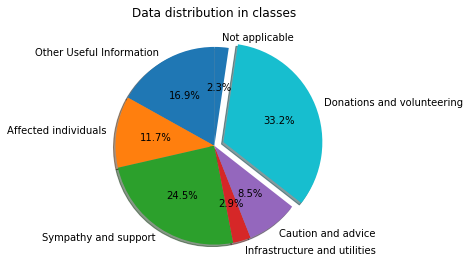

In [9]:
# Get the class frequencies
class_with_frequencies = pd.value_counts(tweets_df['Information Type'].values, sort=False).to_dict()

class_names, class_frequencies = zip(*class_with_frequencies.items())

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
ax.set_title('Data distribution in classes')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']
pie = ax.pie(class_frequencies, labels=class_names, colors=colors, startangle=90, shadow=True, explode=(0,0,0,0,0,0.1,0), autopct='%1.1f%%')
plt.show()

In [10]:
class_dict = {class_name: index for index, class_name in enumerate(class_names)}
tweets_df = tweets_df.reset_index(drop=True)
tweets_df = tweets_df.replace({'Information Type': class_dict})

tweets_df

,Tweet Text,Information Type,Informativeness
0,"May super typhoon pala this weekend, Paano na ...",2,Related - but not informative
1,Tropical storm Haiyan intensifies into typhoon...,4,Related and informative
2,Super Typhoon Yolanda be good sa mga taga Boho...,2,Related - but not informative
3,#YolandaPH pray for the entire Philippines.,2,Related - but not informative
4,Hoping for a no class tomorrow:) #bagyo #yolanda,0,Related - but not informative
5,@TVPatrol #TVPatrol Inalerto agad ni Gov.David...,4,Related and informative
6,"Lord God, I am praying for the safety of all t...",2,Related - but not informative
7,Status update for Typhoon Yolanda. Brace yours...,0,Related and informative
8,Powerful storm heads for Philippines: Authorit...,4,Related and informative
9,` Typhoon YOLANDA Tropical Cyclone Archive | ...,4,Related and informative


### Links and Resources
- Typhoon Haiyan dataset used in the project is downloadable at https://bit.ly/2GX9Xfz.
- Some modules are based on https://github.com/google/eng-edu/tree/master/ml/guides/text_classification
- You may contact me kjbdeluna@up.edu.ph
- Some relevant data can also be found at my [Github](https://www.github.com/kjdeluna)